# Séries temporelles

### Imports

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

import plotly.express as px
from scipy import signal

### Questions

#### 1) Importez les données du fichier Openhealth_S-Grippal.csv. Consultez http://www.openhealth.fr/suivi-epidemiologique-temps-reel/ias-incidence-des-syndromes-grippaux pour plus d’information sur les données. Affichez les 5 premières lignes du jeu de données. On va travailler seulement avec la variable IAS_brut, sous la forme d’une série temporelle, dont on précisera la fréquence d’échantillonage et les dates de début et de fin. Pour cette variable, dans ce jeu de données, les cas de nullité correspondent à des données manquantes. Combien de données manquantes comporte-t-elle ? Pour les traitements des questions suivantes, éliminez les données manquantes par imputation, c’est-à-dire en déduisant une valeur plus “raisonnable” aux dates non-observées à partir des valeurs aux dates observées : par exemple par la moyenne de deux dates les plus proches.

In [60]:
df=pd.read_csv("OpenhealthS-Grippal.csv", delimiter=";", encoding="latin-1", decimal=",", na_values=0)

In [61]:
df.head()

,PERIODE,IAS_brut,IAS_lisse,Incidence_Sentinelles
0,2009-07-01,1.7,2.2,2.3
1,2009-07-02,3.4,2.1,2.3
2,2009-07-03,2.1,2.1,2.3
3,2009-07-04,1.3,2.0,2.3
4,2009-07-05,14.2,2.0,2.3


In [62]:
df.describe

<bound method NDFrame.describe of          PERIODE  IAS_brut  IAS_lisse  Incidence_Sentinelles
0     2009-07-01       1.7        2.2                    2.3
1     2009-07-02       3.4        2.1                    2.3
2     2009-07-03       2.1        2.1                    2.3
3     2009-07-04       1.3        2.0                    2.3
4     2009-07-05      14.2        2.0                    2.3
...          ...       ...        ...                    ...
1747  2014-04-13      77.9        1.8                    NaN
1748  2014-04-14       2.7        1.7                    NaN
1749  2014-04-15       1.0        1.6                    NaN
1750  2014-04-16       1.6        1.6                    NaN
1751  2014-04-17       0.4        1.6                    NaN

[1752 rows x 4 columns]>

In [63]:
df1 = df['IAS_brut']
df1.head()

0     1.7
1     3.4
2     2.1
3     1.3
4    14.2
Name: IAS_brut, dtype: float64

In [64]:
date_debut = min (df['PERIODE'])
print('La date de début est : ',date_debut)
date_fin = max(df['PERIODE'])
print('La date de fin est : ',date_debut)

La date de début est :  2009-07-01
La date de fin est :  2009-07-01


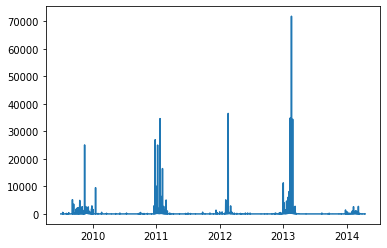

In [120]:
plt.plot(df['PERIODE'], df['IAS_brut'].values)
plt.show()

In [66]:
df['PERIODE-1']=pd.to_datetime(df['PERIODE'].shift())
df['PERIODE']=pd.to_datetime(df['PERIODE'])

In [122]:
df['Frequence_dechantillonage'] = pd.to_datetime(df['PERIODE']) - pd.to_datetime(df['PERIODE-1'])
df.head()

,PERIODE,IAS_brut,IAS_lisse,Incidence_Sentinelles,PERIODE-1,Frequence_dechantillonage
0,2009-07-01,1.7,2.2,2.3,NaT,NaT
1,2009-07-02,3.4,2.1,2.3,2009-07-01,1 days
2,2009-07-03,2.1,2.1,2.3,2009-07-02,1 days
3,2009-07-04,1.3,2.0,2.3,2009-07-03,1 days
4,2009-07-05,14.2,2.0,2.3,2009-07-04,1 days


In [102]:
df['IAS_brut'].isnull().sum()

8

In [109]:
df['IAS_brut'] = df['IAS_brut'].replace(df[df['IAS_brut'] == 0], np.NaN)

In [104]:
imp = SimpleImputer(missing_values=np.NaN, strategy='mean')

In [110]:
df['IAS_brut'] = imp.fit_transform(df['IAS_brut'].values.reshape(-1,1))

In [111]:
df['IAS_brut'].isnull().sum()

0

#### 2) Tracez la série temporelle considérée en fonction du temps. Commentez brièvement ce que vous observez.

In [119]:
fig = px.line(df, x='PERIODE', y='IAS_brut')
fig.show()

Nous observons des gaussiennes autour du mois de février de chaque année.

#### 3) Tracez l’histogramme de la loi marginale. Quel impact la distribution observée par l’histogramme a sur la trajectoire représentée à la question précédente ?

In [137]:
fig = px.histogram(df, x="IAS_brut", nbins=30)
fig.show()

On remarque que la majorité (1716) des valeurs se trouve entre 2500 et 2400. Le reste étant réparti ensuite entre 2500 et 7400 et ensuite 7500 et 12,4K 

#### 4) Reprenez les questions précédentes après tranformations des observations par le logarithme naturel. Commentez.

In [143]:
fig = px.line(df, x='PERIODE', y=np.log(df['IAS_brut']))
fig.show()

On remarque que la transformation logarithmique a eu pour effet de diminuer et stabiliser la variance.

In [144]:
fig = px.histogram(df, x=np.log(df["IAS_brut"]), nbins=30)
fig.show()

#### 5) En utilisant signal.perodogram() (du package signal importé depuis scipy), tracez le périodogramme des données. Expliquez les pics les plus significatifs que vous observez. Attention au fait que dans la communauté signal les spectres sont normalisées pour des fréquences absolues dans [−1/2, 1/2] plutôt que [−π, −π].

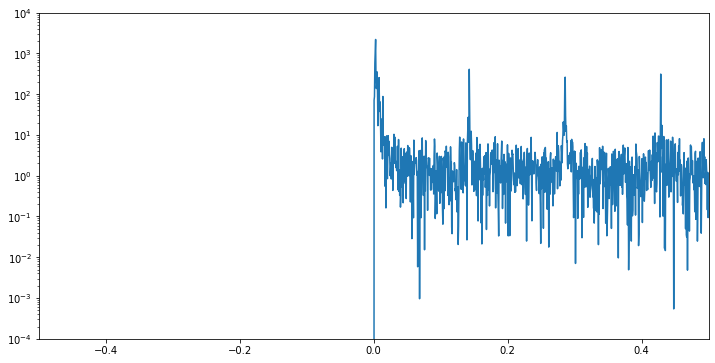

In [149]:
plt.figure(figsize=(12,6))
freq_abs, pow_spect = signal.periodogram(np.log(df['IAS_brut']))
plt.semilogy(freq_abs, pow_spect)
plt.xlim([-0.5, 0.5])
plt.ylim([1e-4, 1e+4])
plt.show()

Les pics correspondent aux valeurs qui ne sont pas expliquées par le bruit de fond.